In [1]:
#! pip install wordcloud
#! pip install tensorflow
#! pip install scikeras

In [2]:
#Basic data libraries
import pandas as pd
import numpy as np

#Models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from scikeras.wrappers import KerasClassifier
 
#Importing libraries necessary for Model Building and Training
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Creating features
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

#Visualisation
import seaborn as sns
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')
from matplotlib import pyplot

#Evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedKFold
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#Other
import warnings
warnings.filterwarnings('ignore')
import string


#https://www.geeksforgeeks.org/detecting-spam-emails-using-tensorflow-in-python/ Accessed 08/03/23


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dicki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Read dataset, using encoding to read any unusual characters found in the dataset
df = pd.read_csv('Spam_Dataset/spam.csv', delimiter=',', encoding='latin-1')
#https://bobbyhadz.com/blog/python-unicodedecodeerror-utf-8-codec-cant-decode-byte Accessed 08/03/23

In [4]:
#Look at initial data
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
#Look at dimensions of dataset
df.shape

(5572, 5)

In [6]:
#Check variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#Look at statistical data about the dataset
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
#Look at the number of NaN values
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
#Drop the three last columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True, axis=1)

In [10]:
#Drop any duplicate rows
df.drop_duplicates(inplace = True)

In [11]:
#Rename columns
df = df.rename(columns={"v1": "spam", "v2": "text"})

In [12]:
#Find length of each tweet using a lambda function and create its own column
df["length"] = df["text"].apply(lambda n: len(n.split()))

#https://thecleverprogrammer.com/2022/06/22/count-number-of-words-in-a-column-using-python/ Accessed 09/02/23

In [13]:
def sentiment_analysis(text):
    def getSubjectivity(text):
        return TextBlob(text).sentiment.subjectivity
  
    #Create a function to get the polarity
    def getPolarity(text):
        return TextBlob(text).sentiment.polarity
  
    #Create two new columns ‘Subjectivity’ & ‘Polarity’
    text['subjectivity'] = text['text'].apply(getSubjectivity)
    text['polarity'] = text['text'].apply(getPolarity)
    #Calculate sentiment
    def getAnalysis(score):
        if score < 0:
            return 'Negative'
        elif score == 0:
            return 'Neutral'
        else:
            return 'Positive'
    text ['sentiment'] = text['polarity'].apply(getAnalysis)
    return text
sentiment_analysis(df)
#https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524 Accessed 05/03/23

,spam,text,length,subjectivity,polarity,sentiment
0,ham,"Go until jurong point, crazy.. Available only ...",20,0.762500,0.150000,Positive
1,ham,Ok lar... Joking wif u oni...,6,0.500000,0.500000,Positive
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,0.550000,0.300000,Positive
3,ham,U dun say so early hor... U c already then say...,11,0.300000,0.100000,Positive
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,0.000000,0.000000,Neutral
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,30,0.611111,0.180556,Positive
5568,ham,Will Ì_ b going to esplanade fr home?,8,0.000000,0.000000,Neutral
5569,ham,"Pity, * was in mood for that. So...any other s...",10,0.287500,-0.112500,Negative
5570,ham,The guy did some bitching but I acted like i'd...,26,0.433333,0.216667,Positive


In [14]:
#Use String module to find list of punctuations
punctuations_list = string.punctuation
def remove_punctuations(text):
    #Remove anything from punctuation list
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)
#Apply to dataset
df['text']= df['text'].apply(lambda x: remove_punctuations(x))
df.head()

,spam,text,length,subjectivity,polarity,sentiment
0,ham,Go until jurong point crazy Available only in ...,20,0.7625,0.15,Positive
1,ham,Ok lar Joking wif u oni,6,0.5000,0.50,Positive
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,0.5500,0.30,Positive
3,ham,U dun say so early hor U c already then say,11,0.3000,0.10,Positive
4,ham,Nah I dont think he goes to usf he lives aroun...,13,0.0000,0.00,Neutral


In [15]:
def remove_stopwords(text):
    #Find stop words from the English version of a stopwords list
    stop_words = stopwords.words('english')
    #Create list
    imp_words = []
 
    # Storing the important words
    for word in str(text).split():
        #Convert word to lower case so captitalisation doesn't affect results
        word = word.lower()
        #Only add words to list that aren't stop words
        if word not in stop_words:
            imp_words.append(word)
 
    output = " ".join(imp_words)
    #Return list
    return output

#Apply function to dataset
df['text'] = df['text'].apply(lambda text: remove_stopwords(text))
df.head()

,spam,text,length,subjectivity,polarity,sentiment
0,ham,go jurong point crazy available bugis n great ...,20,0.7625,0.15,Positive
1,ham,ok lar joking wif u oni,6,0.5000,0.50,Positive
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,28,0.5500,0.30,Positive
3,ham,u dun say early hor u c already say,11,0.3000,0.10,Positive
4,ham,nah dont think goes usf lives around though,13,0.0000,0.00,Neutral


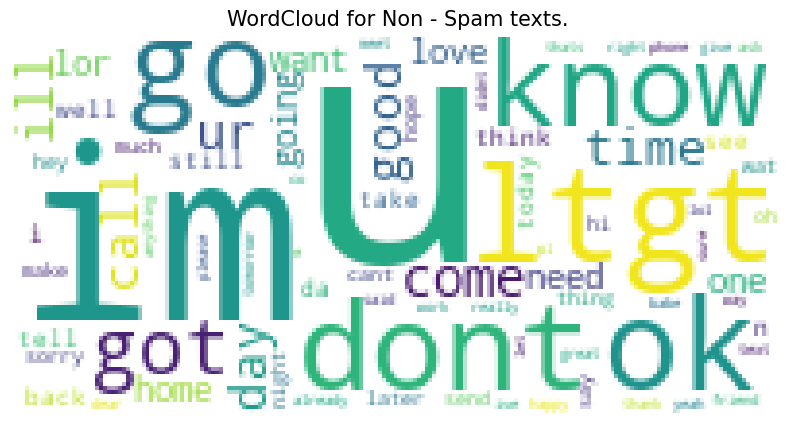

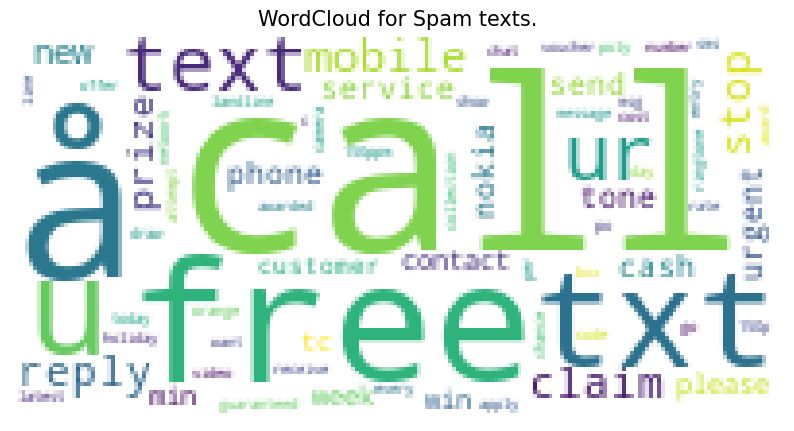

In [16]:
def plot_word_cloud(data, typ):
    text_corpus = " ".join(data['text'])
     
    #Create figure and set variables such as colour. Then, generate from the data fed in
    plt.figure(figsize=(10, 10))
    wc = WordCloud(background_color='white',
                   max_words=100,
                   width=200,
                   height=100,
                   collocations=False).generate(text_corpus)
 
    plt.title(f'WordCloud for {typ} texts.', fontsize=15)
    plt.axis('off')
    plt.imshow(wc)
    plt.show()
    print()

#Plot word clouds
plot_word_cloud(df[df['spam'] == 'ham'], typ='Non - Spam')
plot_word_cloud(df[df['spam'] == 'spam'], typ='Spam')

In [17]:
def count_symbols_and_numbers(text, value):
    #Calculate sum of eacg type
    numbers = sum(c.isdigit() for c in text)
    letters = sum(c.isalpha() for c in text)
    spaces  = sum(c.isspace() for c in text)
    #Create Others from everything else
    others  = len(text) - numbers - letters - spaces
    #Return a variable based on what was requested
    if value == 1:
        return others
    elif value == 2:
        return numbers
    elif value == 3:
        return spaces
    elif value == 4:
        return letters
#Create new columns for each new feature and apply function
df['symbols'] = df['text'].apply(count_symbols_and_numbers, value = 1)
df['numbers'] = df['text'].apply(count_symbols_and_numbers, value = 2)
df['spaces'] = df['text'].apply(count_symbols_and_numbers, value = 3)
df['letters'] = df['text'].apply(count_symbols_and_numbers, value = 4)

#https://stackoverflow.com/questions/24878174/how-to-count-digits-letters-spaces-for-a-string-in-python Accessed 08/03/23

In [18]:
#Check data again
df.head(10)

,spam,text,length,subjectivity,polarity,sentiment,symbols,numbers,spaces,letters
0,ham,go jurong point crazy available bugis n great ...,20,0.762500,0.150000,Positive,0,0,15,67
1,ham,ok lar joking wif u oni,6,0.500000,0.500000,Positive,0,0,5,18
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,28,0.550000,0.300000,Positive,0,25,22,88
3,ham,u dun say early hor u c already say,11,0.300000,0.100000,Positive,0,0,8,27
4,ham,nah dont think goes usf lives around though,13,0.000000,0.000000,Neutral,0,0,7,36
5,spam,freemsg hey darling 3 weeks word back id like ...,32,0.233333,0.308333,Positive,1,4,18,66
6,ham,even brother like speak treat like aids patent,16,0.000000,0.000000,Neutral,0,0,7,39
7,ham,per request melle melle oru minnaminunginte nu...,26,0.000000,0.000000,Neutral,0,1,15,97
8,spam,winner valued network customer selected receiv...,26,1.000000,0.000000,Neutral,1,19,17,85
9,spam,mobile 11 months u r entitled update latest co...,29,0.750000,0.475000,Positive,0,13,17,79


In [19]:
#Encode spam column as numbers
bin_encoder=LabelEncoder()
df.spam=bin_encoder.fit_transform(df.spam)

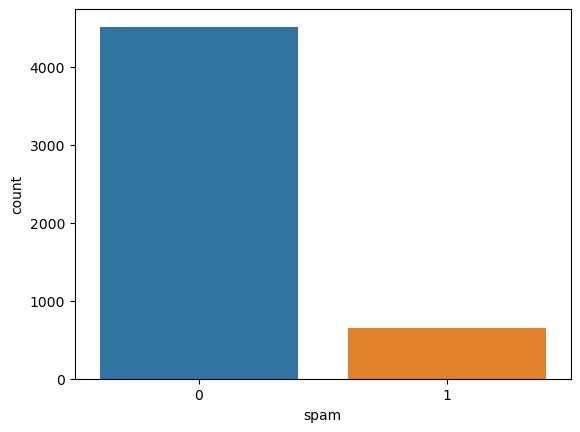

In [20]:
#Display plot of the count of each type
sns.countplot(df['spam'])
plt.show()

Text(0.5, 0, 'Message types')

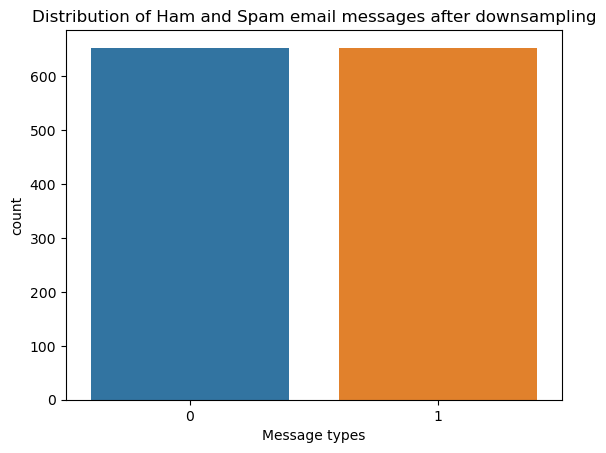

In [21]:
# Downsampling to balance the dataset
ham_msg = df[df.spam == 0]
spam_msg = df[df.spam == 1]
ham_msg = ham_msg.sample(n = len(spam_msg), random_state=42)
 
# Plotting the counts of down sampled dataset
balanced_data = ham_msg.append(spam_msg).reset_index(drop = True)

#Plot fugure again
#plt.figure(figsize = (8, 6))
sns.countplot(balanced_data.spam)
plt.title('Distribution of Ham and Spam email messages after downsampling')
plt.xlabel('Message types')

In [22]:
#Check head of dataset again
df.head()

,spam,text,length,subjectivity,polarity,sentiment,symbols,numbers,spaces,letters
0,0,go jurong point crazy available bugis n great ...,20,0.7625,0.15,Positive,0,0,15,67
1,0,ok lar joking wif u oni,6,0.5000,0.50,Positive,0,0,5,18
2,1,free entry 2 wkly comp win fa cup final tkts 2...,28,0.5500,0.30,Positive,0,25,22,88
3,0,u dun say early hor u c already say,11,0.3000,0.10,Positive,0,0,8,27
4,0,nah dont think goes usf lives around though,13,0.0000,0.00,Neutral,0,0,7,36


In [23]:
#Compare balanced data against regular dataset to confirm that nothing came out strangely
balanced_data.head()

,spam,text,length,subjectivity,polarity,sentiment,symbols,numbers,spaces,letters
0,0,come slave going shell unconsciously avoiding ...,24,0.950000,-0.675000,Negative,0,0,7,53
1,0,u meet fren dun wan meet ah muz b guy rite,14,0.262500,-0.162500,Negative,0,0,10,32
2,0,g says never answer texts confirmdeny,8,0.000000,0.000000,Neutral,0,0,5,32
3,0,k much 8th fifty,10,0.200000,0.200000,Positive,0,1,3,12
4,0,hmm yeah grooved im looking forward pound special,17,0.785714,0.428571,Positive,0,0,7,42


In [24]:
#Check new dimensions
balanced_data.shape

(1306, 10)

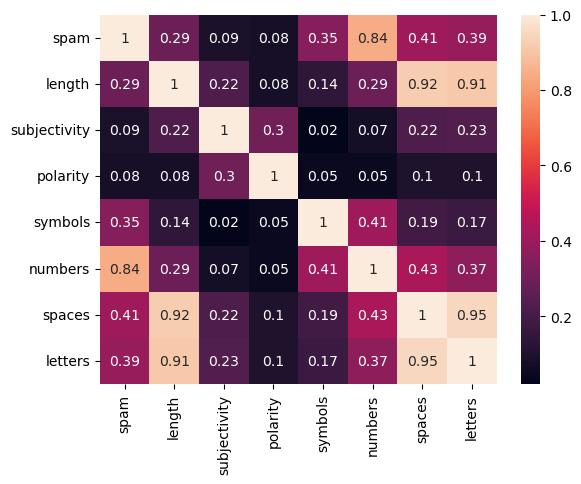

In [25]:
#Plot heatmap of unbalanced data
sns.heatmap(df.corr().round(2), annot=True)
plt.show()

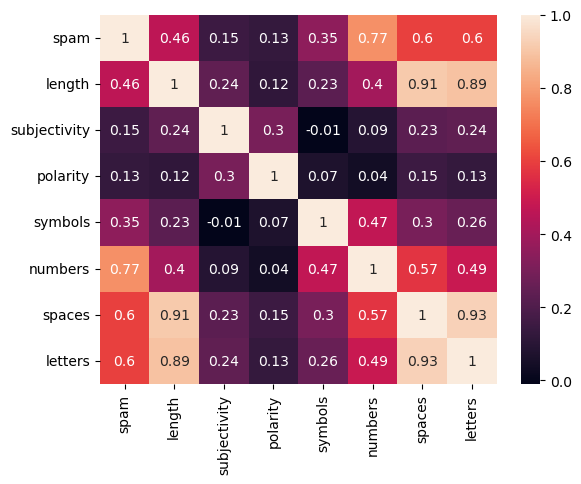

In [26]:
#Plot heatmap of balanced data
sns.heatmap(balanced_data.corr().round(2), annot=True)
plt.show()

In [27]:
#Split into seperate dataframes for the features and the category
features = df.iloc[:,0:]
target = df.iloc[:,0]
#Split into training and testing data
features_train, features_test, target_train, target_test = train_test_split(features,target, test_size = 0.33, random_state = 10)

In [28]:
#Split balanced data into seperate dataframes for the features and the category
featuresB = balanced_data.iloc[:,0:]
targetB = balanced_data.iloc[:,0]
#Split into training and testing data
features_trainB, features_testB, target_trainB, target_testB = train_test_split(featuresB,targetB, test_size = 0.33, random_state = 10)

In [29]:
from sklearn.naive_bayes import GaussianNB
def evaluate_model(X, y, repeats):
    # prepare the repeated k-fold cross-validation procedure with 10 splits
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # create Multinomial Naive Bayes model using pipeline
    model = make_pipeline(TfidfVectorizer(), MultinomialNB())
    #model = GaussianNB()
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
#https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html Accessed 15/03/23

In [30]:
#Repeat 10 times
repeats = range(1,11)
#Create empty list
results = list()
for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(features.text, target, r)
    # summarize mean and standard error
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    # store
    results.append(scores)
#https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/ Accessed 15/03/23

>1 mean=0.9598 se=0.002
>2 mean=0.9602 se=0.002
>3 mean=0.9602 se=0.002
>4 mean=0.9601 se=0.001
>5 mean=0.9600 se=0.001
>6 mean=0.9601 se=0.001
>7 mean=0.9600 se=0.001
>8 mean=0.9601 se=0.001
>9 mean=0.9602 se=0.001
>10 mean=0.9601 se=0.001


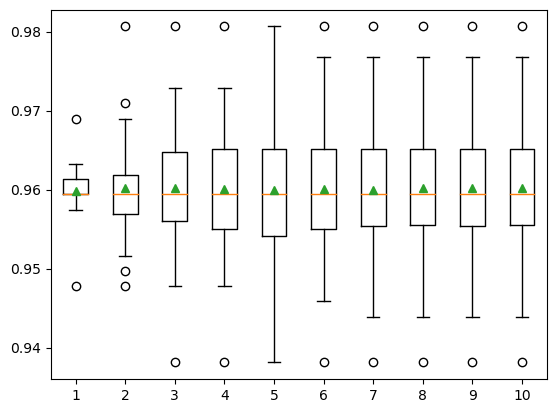

In [31]:
#Create boxplot of results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

In [32]:
results = list()
for r in repeats:
    # evaluate balanced data using a given number of repeats
    scores = evaluate_model(featuresB.text, targetB, r)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    # store
    results.append(scores)

>1 mean=0.9410 se=0.009
>2 mean=0.9406 se=0.005
>3 mean=0.9405 se=0.004
>4 mean=0.9427 se=0.003
>5 mean=0.9421 se=0.003
>6 mean=0.9429 se=0.003
>7 mean=0.9423 se=0.003
>8 mean=0.9421 se=0.003
>9 mean=0.9422 se=0.002
>10 mean=0.9416 se=0.002


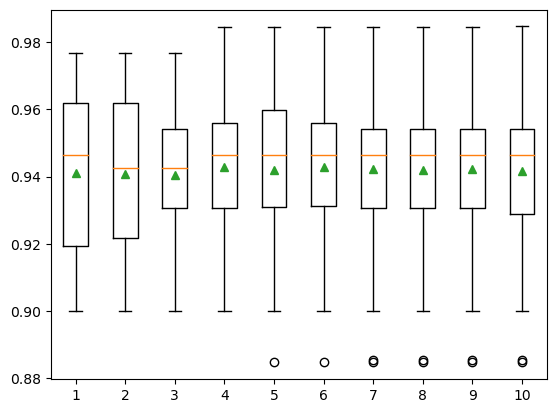

In [33]:
#Create boxplot of results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

In [34]:
# create model
def create_baseline():
    #Use keras sequential model
    model = tf.keras.Sequential()
    #Convert input into correct shape
    model.add(tf.keras.Input(shape=(8,)))
    #Create layer of 15 nodes in a dense layer (a layer which is connected with every node of the prior layer)
    model.add(tf.keras.layers.Dense(15, input_shape=(60,), activation='relu'))
    #Create another layer of 10 nodes. Use sigmoid function to help identify non-linear relationships within the data 
    #(https://www.learndatasci.com/glossary/sigmoid-function/ Accessed 17/03/23)
    model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
    #Compile model
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model
##https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/ Accessed 14/03/23

In [35]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        #If accuracy equals one, stop training
        if(logs.get('accuracy')==1):
            print("\nReached 100% accuracy so cancelling training!")
            self.model.stop_training = True

In [36]:
#Drop string features since the keras model won't take these
features.drop(['sentiment'], inplace=True, axis=1)
features.drop(['text'], inplace=True, axis=1)
featuresB.drop(['sentiment'], inplace=True, axis=1)
featuresB.drop(['text'], inplace=True, axis=1)
#Drop features for confusion matrix for keras model later
keras_features_train = features_train.drop(['sentiment'], axis=1)
keras_features_train = keras_features_train.drop(['text'], axis=1)
keras_features_test = features_test.drop(['sentiment'], axis=1)
keras_features_test = keras_features_test.drop(['text'], axis=1)


In [37]:
keras_features_trainB = features_trainB.drop(['sentiment'], axis=1)
keras_features_trainB = keras_features_trainB.drop(['text'], axis=1)
keras_features_testB = features_testB.drop(['sentiment'], axis=1)
keras_features_testB = keras_features_testB.drop(['text'], axis=1)

In [38]:
def evaluate_keras_model(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=repeats, random_state=1)
    # create model
    model = KerasClassifier(model=create_baseline, epochs=100, batch_size=5, verbose=0, callbacks=[myCallback()])
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
#Repeat 10 times
repeats = range(1,11)
results = list()
for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_keras_model(features, target, r)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    # store
    results.append(scores)

>1 mean=0.9594 se=0.018
>2 mean=0.9635 se=0.013
>3 mean=0.9674 se=0.010
>4 mean=0.9560 se=0.011
>5 mean=0.9457 se=0.009
>6 mean=0.9642 se=0.008
>7 mean=0.9642 se=0.007
>8 mean=0.9598 se=0.007
>9 mean=0.9614 se=0.007
>10 mean=0.9536 se=0.007


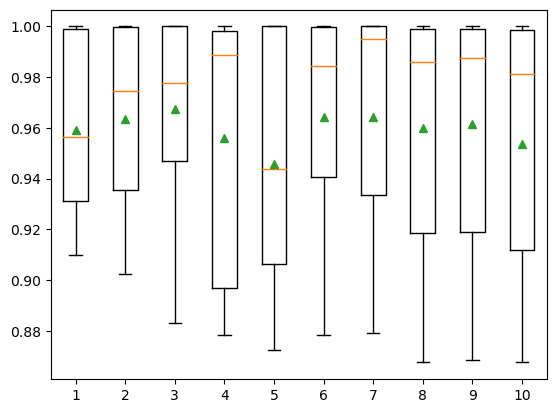

In [39]:
#Show boxplot
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

In [40]:
#Set 10 repeats
repeats = range(1,11)
results = list()
#Repeat process for balanced data
for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_keras_model(featuresB, targetB, r)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    # store
    results.append(scores)

>1 mean=0.9234 se=0.024
>2 mean=nan se=nan
>3 mean=0.8639 se=0.046
>4 mean=0.8180 se=0.042
>5 mean=0.8465 se=0.032
>6 mean=0.8378 se=0.032
>7 mean=0.8797 se=0.027
>8 mean=0.8504 se=0.027
>9 mean=0.8663 se=0.025
>10 mean=0.8605 se=0.024


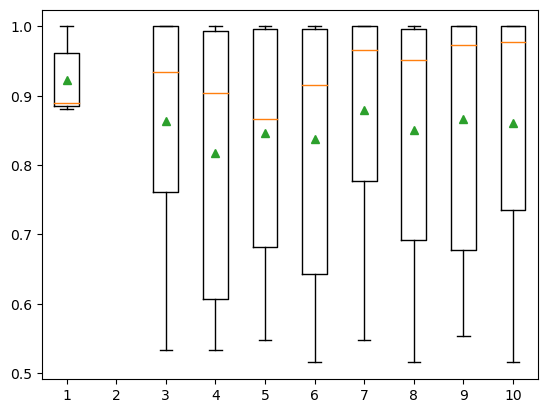

In [41]:
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(features, target)
print(model.feature_importances_)

#https://machinelearningmastery.com/feature-selection-machine-learning-python/ Accessed 18/03/23

[0.50778783 0.02363654 0.00166022 0.00215316 0.00608773 0.41520628
 0.02783044 0.0156378 ]


In [43]:
kModel = create_baseline()
kModel.fit(keras_features_train, target_train, batch_size=32, shuffle=True, validation_split=0.2, epochs=100, callbacks=[myCallback()])

Epoch 1/100
87/87 [==============================] - 1s 5ms/step - loss: 7.5416 - accuracy: 0.4567 - val_loss: 2.5477 - val_accuracy: 0.8658
Epoch 2/100
87/87 [==============================] - 0s 3ms/step - loss: 0.8546 - accuracy: 0.9181 - val_loss: 0.3186 - val_accuracy: 0.9553
Epoch 3/100
87/87 [==============================] - 0s 3ms/step - loss: 0.2386 - accuracy: 0.9574 - val_loss: 0.2751 - val_accuracy: 0.9610
Epoch 4/100
87/87 [==============================] - 0s 3ms/step - loss: 0.1888 - accuracy: 0.9621 - val_loss: 0.2461 - val_accuracy: 0.9639
Epoch 5/100
87/87 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9668 - val_loss: 0.2194 - val_accuracy: 0.9654
Epoch 6/100
87/87 [==============================] - 0s 3ms/step - loss: 0.1424 - accuracy: 0.9700 - val_loss: 0.2064 - val_accuracy: 0.9610
Epoch 7/100
87/87 [==============================] - 0s 3ms/step - loss: 0.1312 - accuracy: 0.9693 - val_loss: 0.1919 - val_accuracy: 0.9610
Epoch 8/100
8

54/54 [==============================] - 0s 1ms/step


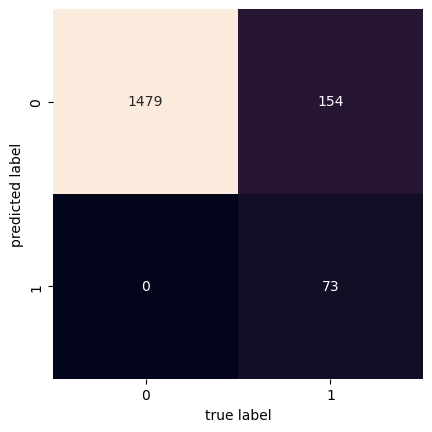

In [44]:
y_prediction = kModel.predict(keras_features_test)
y_prediction = np.argmax (y_prediction, axis = 1)
mat = confusion_matrix(target_test, y_prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
#https://stackoverflow.com/questions/70775762/how-to-make-a-confusion-matrix-with-keras Accessed 18/03/23

In [45]:
nbModel = make_pipeline(TfidfVectorizer(), MultinomialNB())
nbModel.fit(features_train.text, target_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

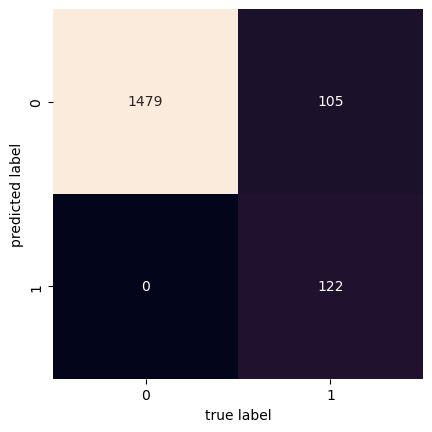

In [46]:
y_prediction = nbModel.predict(features_test.text)
mat = confusion_matrix(target_test, y_prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [54]:
kModelB = create_baseline()
kModelB.fit(keras_features_trainB, target_trainB, batch_size=32, shuffle=True, validation_split=0.2, epochs=100, callbacks=[myCallback()])


Epoch 1/100
22/22 [==============================] - 1s 9ms/step - loss: 18.3586 - accuracy: 0.0000e+00 - val_loss: 12.4349 - val_accuracy: 0.0171
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 7.1096 - accuracy: 0.1943 - val_loss: 4.3951 - val_accuracy: 0.4571
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 2.9723 - accuracy: 0.4743 - val_loss: 2.1354 - val_accuracy: 0.4971
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 1.0529 - accuracy: 0.6000 - val_loss: 0.4528 - val_accuracy: 0.8914
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.4724 - accuracy: 0.8857 - val_loss: 0.3605 - val_accuracy: 0.9143
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.3930 - accuracy: 0.9000 - val_loss: 0.3390 - val_accuracy: 0.9314
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.3710 - accuracy: 0.9014 - val_loss: 0.3181 - val_accuracy: 0.9371
Epoch 8

Epoch 59/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0691 - accuracy: 0.9829 - val_loss: 0.0663 - val_accuracy: 0.9771
Epoch 60/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0662 - accuracy: 0.9843 - val_loss: 0.0651 - val_accuracy: 0.9829
Epoch 61/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.9843 - val_loss: 0.0638 - val_accuracy: 0.9771
Epoch 62/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0643 - accuracy: 0.9843 - val_loss: 0.0616 - val_accuracy: 0.9886
Epoch 63/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0614 - accuracy: 0.9857 - val_loss: 0.0598 - val_accuracy: 0.9771
Epoch 64/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.9843 - val_loss: 0.0596 - val_accuracy: 0.9886
Epoch 65/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9900 - val_loss: 0.0568 - val_accuracy: 0.9771
Epoch 

14/14 [==============================] - 0s 970us/step


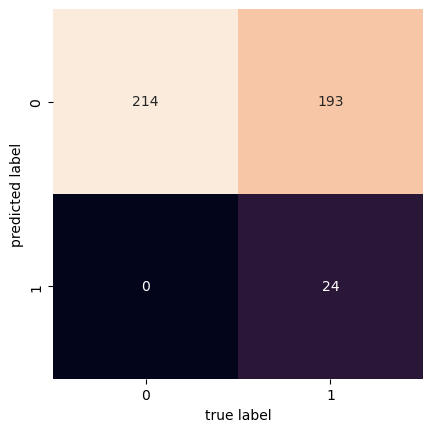

In [55]:
y_prediction = kModelB.predict(keras_features_testB)
y_prediction = np.argmax (y_prediction, axis = 1)
mat = confusion_matrix(target_testB, y_prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [49]:
nbModelB = make_pipeline(TfidfVectorizer(), MultinomialNB())
nbModelB.fit(features_trainB.text, target_trainB)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

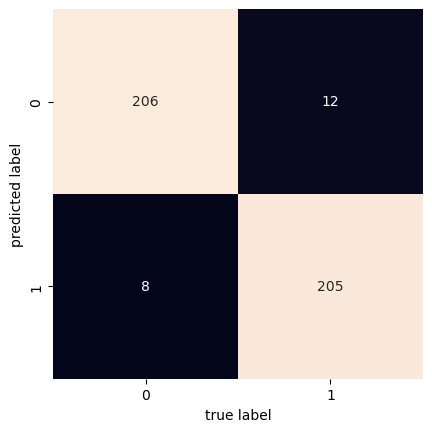

In [50]:
y_prediction = nbModelB.predict(features_testB.text)
mat = confusion_matrix(target_testB, y_prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');